**Problem 1**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy.stats import linregress

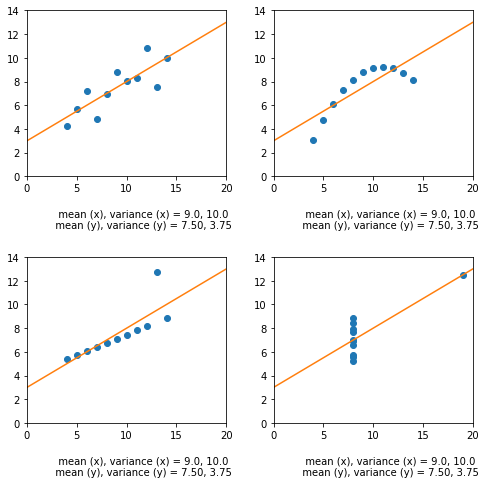

In [2]:
ans = np.load('anscombe.npy')
fig, axes = plt.subplots(2, 2, figsize=(7, 7))

for i, ax in zip(range(0, 8, 2), axes.flatten()):

    a, b, c, p_value, σ = linregress(ans[:, i], ans[:, i+1])
    x = np.linspace(0, 20)
    ax.plot(ans[:, i], ans[:, i+1], 'o')
    ax.plot(x, b + a * x)
    ax.set(xlim=(0, 20), ylim=(0, 14),
          xlabel=rf'''
           mean (x), variance (x) = {ans[:, i].mean()}, {ans[:, i].var()}
           mean (y), variance (y) = {ans[:, i+1].mean():.2f}, {ans[:, i+1].var():.2f}
           ''')
    
    
    
plt.tight_layout()
plt.show()

In [3]:
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(ans[:, 0], 
                                                                ans[:, 1])
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(ans[:, 2], 
                                                                ans[:, 3])
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(ans[:, 4],
                                                                ans[:, 5])
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(ans[:, 6],
                                                                    ans[:, 7])
list_slope = [slope1, slope2, slope3, slope4]
list_intercept = [intercept1, intercept2, intercept3, intercept4]
list_rvalue = [r_value1, r_value2, r_value3, r_value4]


print("Starting from the upper left subplot, and moving clockwise:\n")

for i in range(0, 4):
    print("slope", i+1, " = ", list_slope[i])
    print("intercept", i+1, " = ", list_intercept[i])
    print("correlation coefficient", i+1, " = ", list_rvalue[i])
    print("see below graph for corresponding means and variances \n")
    

Starting from the upper left subplot, and moving clockwise:

slope 1  =  0.5000909090909091
intercept 1  =  3.0000909090909103
correlation coefficient 1  =  0.8164205163448399
see below graph for corresponding means and variances 

slope 2  =  0.5000000000000001
intercept 2  =  3.000909090909089
correlation coefficient 2  =  0.816236506000243
see below graph for corresponding means and variances 

slope 3  =  0.4997272727272729
intercept 3  =  3.002454545454544
correlation coefficient 3  =  0.8162867394895984
see below graph for corresponding means and variances 

slope 4  =  0.4999090909090909
intercept 4  =  3.0017272727272726
correlation coefficient 4  =  0.8165214368885028
see below graph for corresponding means and variances 



Here we see that the slope, intercept, correlation coefficent, mean of x and y, and variance of x and y for each are about identical. But clearly the data show a different patterns among each. This is why visualizations are important. If we realied solely on the summary statistics, we wouold get the same information each time. By graphing it, we can visualize what is going on.

**Problem 2**

<function matplotlib.pyplot.show(*args, **kw)>

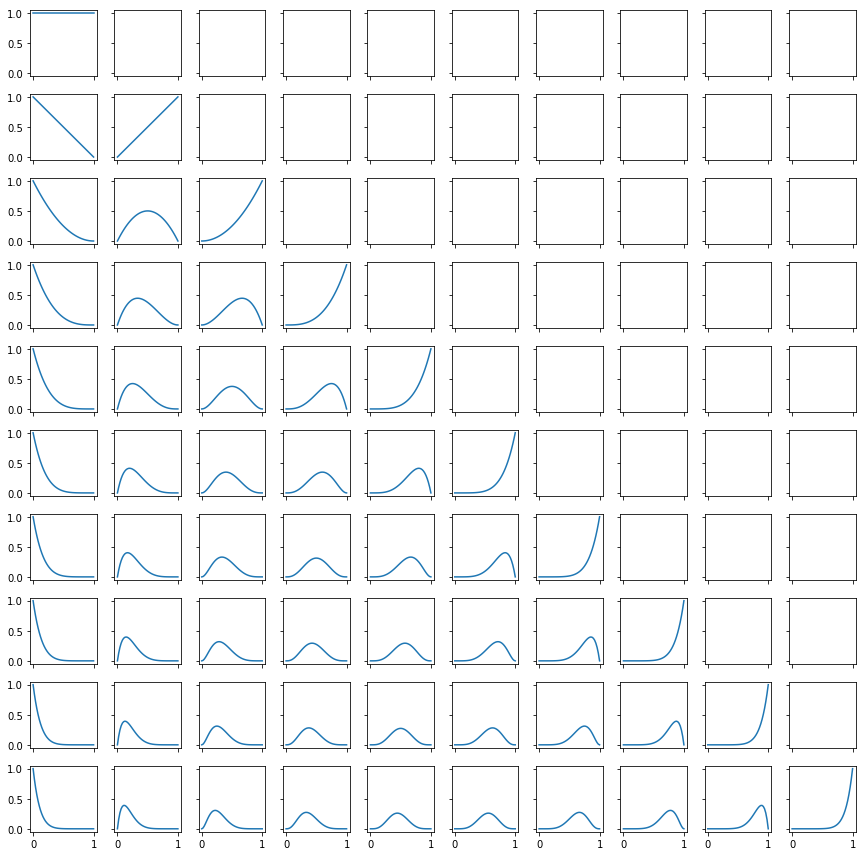

In [4]:
from scipy import special

def b(n, v, x):
    return(special.binom(n, v) * (x ** v) * (1 - x) ** (n - v))

x = np.linspace(0, 1)
A = np.arange(0, 10, 1)

fig, axes = plt.subplots(len(A), len(A), figsize=(12, 12), sharex=True, 
                         sharey=True)

for n in A:
    for v in range(n+1):
        axes[n, v].plot(x, b(n, v, x))

plt.tight_layout()
plt.show

**Problem 3**

In [5]:
mlb = np.load('MLB.npy')

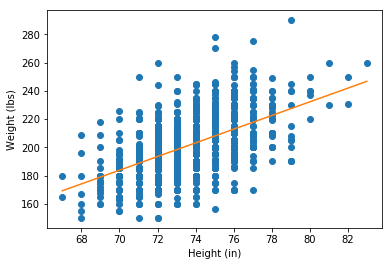

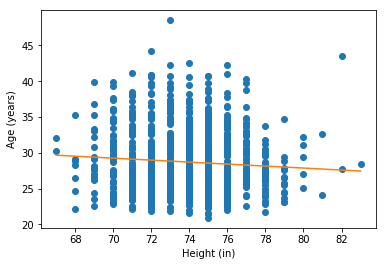

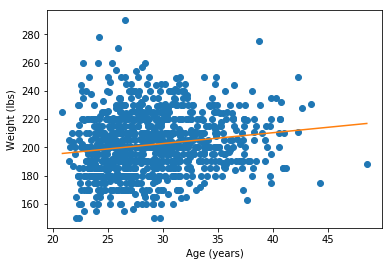

In [6]:
# Plot between height and weight
m, c, r, p_value, σ = linregress(mlb[:, 0], mlb[:, 1])
x = np.linspace(min(mlb[:, 0]), max(mlb[:, 0]))
plt.plot(mlb[:, 0], mlb[:, 1], 'o')
plt.plot(x, c + m * x)
plt.xlabel('Height (in)')
plt.ylabel('Weight (lbs)')
plt.show()

#plot between height and age
m, c, r, p_value, σ = linregress(mlb[:, 0], mlb[:, 2])
x = np.linspace(min(mlb[:, 0]), max(mlb[:, 0]))
plt.plot(mlb[:, 0], mlb[:, 2], 'o')
plt.plot(x, c + m * x)
plt.xlabel('Height (in)')
plt.ylabel('Age (years)')
plt.show()

# plot between age and weight
m, c, r, p_value, σ = linregress(mlb[:, 2], mlb[:, 1])
x = np.linspace(min(mlb[:, 2]), max(mlb[:, 2]))
plt.plot(mlb[:, 2], mlb[:, 1], 'o')
plt.plot(x, c + m * x)
plt.xlabel('Age (years)')
plt.ylabel('Weight (lbs)')
plt.show()

**Problem 4**

In [7]:
year, magnitude, longitude, latitude = np.load('earthquakes.npy').T

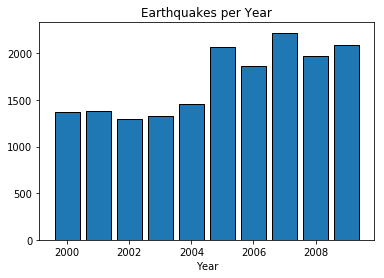

In [8]:
year = np.array(year, dtype=int)
amount = num_earthquakes = [sum(year == x) for x in np.unique(year)]

plt.bar(np.unique(year), amount, edgecolor='k')
plt.xlabel('Year')
plt.title('Earthquakes per Year')
plt.show()

Scatter Plot

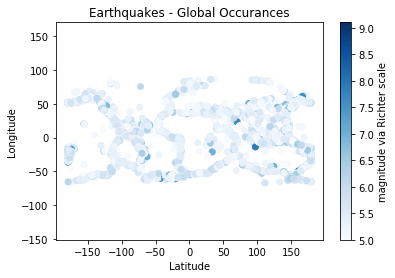

In [9]:
plt.scatter(longitude, latitude, c=magnitude, cmap='Blues')
plt.colorbar(label='magnitude via Richter scale')
plt.axis('equal')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Earthquakes - Global Occurances')
plt.show()

Histogram

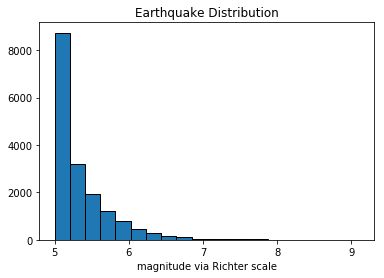

In [10]:
plt.hist(magnitude, bins=20, edgecolor='k')
plt.xlabel('magnitude via Richter scale')
plt.title('Earthquake Distribution')
plt.show()

**Problem 5**

Heat map

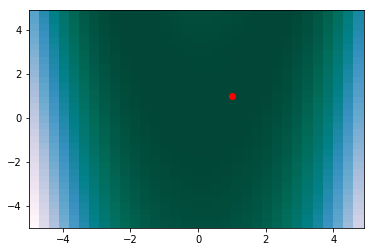

In [11]:
def f(x, y):
    return(((1 - x) ** 2) + (100 * (y - (x ** 2))** 2))

xmin = -5
xmax = 5
xgrid = np.arange(xmin, xmax, 0.3)
x, y = np.meshgrid(xgrid, xgrid)
plt.pcolormesh(x, y, -f(x, y), cmap='PuBuGn') #Spectral looks really cool
plt.scatter(1, 1, c='r')
plt.show()

Contour map

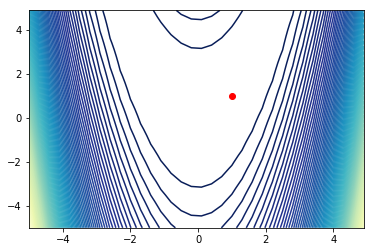

In [12]:
plt.contour(x, y, -f(x, y), 100, cmap='YlGnBu')
plt.scatter(1, 1, c='r')
plt.show()

**Problem 6**

In [13]:
pop, gdp, ht_male, ht_fem = np.load('countries.npy').T

In [14]:
countries = ["Austria", "Bolivia", "Brazil", "China",
             "Finland", "Germany", "Hungary", "India",
             "Japan", "North Korea", "Montenegro", "Norway",
             "Peru", "South Korea", "Sri Lanka", "Switzerland",
             "Turkey", "United Kingdom", "United States", "Vietnam"]
countries = np.array(countries)

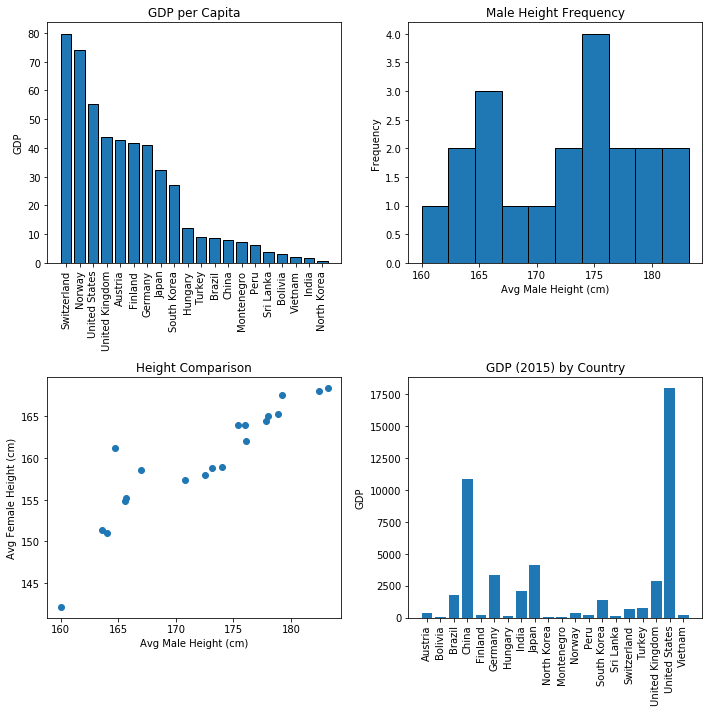

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Bar - GDP per capita
gdp_pcap = gdp / pop
g = np.argsort(gdp_pcap)[::-1]

location = np.arange(len(countries))
axes[0,0].bar(location, gdp_pcap[g], edgecolor='k')
axes[0,0].set_xticks(location)
axes[0,0].set_xticklabels(countries[g], rotation='90')
axes[0,0].set_ylabel("GDP")
axes[0,0].set_title("GDP per Capita")




# Histogram - Male height distribution over countries
axes[0,1].hist(ht_male, bins = 10, edgecolor='k')
axes[0,1].set_xlabel("Avg Male Height (cm)")
axes[0,1].set_ylabel("Frequency")
axes[0,1].set_title("Male Height Frequency")

#Scatter - Female height vs. male height
axes[1,0].scatter(ht_male, ht_fem)
axes[1,0].set_xlabel("Avg Male Height (cm)")
axes[1,0].set_ylabel("Avg Female Height (cm)")
axes[1,0].set_title("Height Comparison")

# GDP of each country
axes[1,1].bar(location, gdp)
axes[1,1].set_xticks(location)
axes[1,1].set_xticklabels(countries, rotation='90')
axes[1,1].set_ylabel("GDP")
axes[1,1].set_title("GDP (2015) by Country")


plt.tight_layout()
plt.show()